In [ ]:
import os
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from spectral_connectivity import Multitaper, Connectivity
import scipy.io
from scipy.signal import butter, filtfilt

class LoadData:
    def __init__(self, base_dir):
        self.base_dir = base_dir

    def squeeze_all(self, data):
        """
        Recursively squeeze all arrays in the dictionary.
        """
        for key, value in data.items():
            if isinstance(value, np.ndarray):
                data[key] = np.squeeze(value)
            elif isinstance(value, dict):
                self.squeeze_all(value)
        return data

    def combine_electrodes(self, session_name):
        session_dir = os.path.join(self.base_dir, session_name)
        os.chdir(session_dir)

        # Initialize an empty dictionary to store combined data
        combined_data = {}

        # Iterate over each channel file and load the data
        for i in range(1, 129):  # Assuming channel numbers range from 1 to 128
            filename = f'ECoG_ch{i}.mat'
            if os.path.exists(filename):
                mat_file = scipy.io.loadmat(filename)
                combined_data[f'channel_{i}'] = np.squeeze(mat_file[f'ECoGData_ch{i}'])

        # Load the ECoGTime.mat file and add it to the combined data
        time_file = 'ECoGTime.mat'
        if os.path.exists(time_file):
            time_data = scipy.io.loadmat(time_file)
            combined_data['ECoGTime'] = np.squeeze(time_data['ECoGTime'])

        # Save the combined data into a new .mat file
        output_filename = f'{session_name}_ECoG_Data.mat'
        scipy.io.savemat(output_filename, combined_data)

        print(f'Combined data saved to {output_filename}')

    def load_and_squeeze(self, session_name):
        session_file = os.path.join(self.base_dir, session_name, f'{session_name}_ECoG_Data.mat')
        data = scipy.io.loadmat(session_file)

        # Squeeze all arrays in the data dictionary
        data = self.squeeze_all(data)

        return data

    def plot_data(self, session_name, channel_num):
        data = self.load_and_squeeze(session_name)
        plt.plot(data['ECoGTime'], data[f'channel_{channel_num}'])
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.title(f'{session_name} Channel {channel_num}')
        plt.show()


class PlotData:
    def __init__(self, loader):
        self.loader = loader

    def plot_grid(self, session_name, channel_nums):
        data = self.loader.load_and_squeeze(session_name)

        num_channels = len(channel_nums)
        fig, axes = plt.subplots(1, num_channels, figsize=(15, 5), sharex=True, sharey=True)

        for i, channel_num in enumerate(channel_nums):
            axes[i].plot(data['ECoGTime'], data[f'channel_{channel_num}'])
            axes[i].set_title(f'Channel {channel_num}')
            axes[i].set_xlabel('Time')
            axes[i].set_ylabel('Amplitude')

        plt.tight_layout()
        plt.show()

    def plot_spectrogram(self, session_name, channel_num):

        data = self.loader.load_and_squeeze(session_name)

        ecog_data = data[f'channel_{channel_num}']#[:90000]
        ecog_time = data['ECoGTime']#[:90000]

        fs = 1/ (ecog_time[1] - ecog_time[0])     # Define the sampling interval.
        NW = 4  # Define the normalized time-bandwidth product,
                # ... and compute the multitaper spectrum.
        multitaper = Multitaper(ecog_data, sampling_frequency=fs, time_halfbandwidth_product=NW, time_window_duration=30.0, start_time=ecog_time[0])
        connectivity = Connectivity.from_multitaper(multitaper)

        freq_limit = 100  # Set the frequency limit in Hz
        idx_limit = np.argmax(connectivity.frequencies > freq_limit)

        f_limited = connectivity.frequencies[:idx_limit]
        Sxx_limited = connectivity.power().squeeze().T[:idx_limit]

        plt.figure(figsize=(12, 6))
        plt.pcolormesh(
            connectivity.time,
            f_limited,
            10 * np.log10(Sxx_limited),
            shading='gouraud',
            cmap='jet'
        )

        plt.ylabel("Frequency [Hz]")
        plt.xlabel("Time [s]")
        plt.colorbar(label='Power (dB)')
        plt.vlines([21.82, 676.11, 1250.12, 2931.97], 0, freq_limit, colors='k', ls='--')
        plt.savefig('114multi100.png', transparent = True)
        plt.show()



In [ ]:
pip install spectral_connectivity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 1.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load in Data

In [ ]:
# Base directory where sessions are stored
base_dir = '/content/drive/MyDrive/RISE_Data/Ketamine_Chibi'

# Create an instance of the loader
loader = LoadData(base_dir)

session = 'Session2' # 'Session1', 'Session2', 'Session3'

# Process each session to combine electrode data
loader.combine_electrodes(session)

combined_data = loader.load_and_squeeze(session)

print(combined_data.keys())

Combined data saved to Session2_ECoG_Data.mat
dict_keys(['__header__', '__version__', '__globals__', 'channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5', 'channel_6', 'channel_7', 'channel_8', 'channel_9', 'channel_10', 'channel_11', 'channel_12', 'channel_13', 'channel_14', 'channel_15', 'channel_16', 'channel_17', 'channel_18', 'channel_19', 'channel_20', 'channel_21', 'channel_22', 'channel_23', 'channel_24', 'channel_25', 'channel_26', 'channel_27', 'channel_28', 'channel_29', 'channel_30', 'channel_31', 'channel_32', 'channel_33', 'channel_34', 'channel_35', 'channel_36', 'channel_37', 'channel_38', 'channel_39', 'channel_40', 'channel_41', 'channel_42', 'channel_43', 'channel_44', 'channel_45', 'channel_46', 'channel_47', 'channel_48', 'channel_49', 'channel_50', 'channel_51', 'channel_52', 'channel_53', 'channel_54', 'channel_55', 'channel_56', 'channel_57', 'channel_58', 'channel_59', 'channel_60', 'channel_61', 'channel_62', 'channel_63', 'channel_64', 'channel_65'

In [ ]:
combined_data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Aug  1 20:44:40 2024',
 '__version__': '1.0',
 '__globals__': [],
 'channel_1': array([ 75,  94, 116, ..., 303, 290, 282], dtype=int16),
 'channel_2': array([158, 177, 196, ..., 218, 213, 210], dtype=int16),
 'channel_3': array([185, 192, 186, ..., 158, 169, 186], dtype=int16),
 'channel_4': array([ 43,  48,  69, ..., 171, 193, 198], dtype=int16),
 'channel_5': array([65, 44, 45, ..., 46, 48, 36], dtype=int16),
 'channel_6': array([ 25,  14,  13, ...,  99, 112,  93], dtype=int16),
 'channel_7': array([-21, -17, -11, ...,  48,  21,  -2], dtype=int16),
 'channel_8': array([ 14,   1,   8, ..., -33, -25, -18], dtype=int16),
 'channel_9': array([125, 140, 123, ...,  38,  46,  58], dtype=int16),
 'channel_10': array([-17, -29, -19, ..., 116, 120, 110], dtype=int16),
 'channel_11': array([-28, -23, -20, ..., 126, 124, 139], dtype=int16),
 'channel_12': array([-211, -184, -166, ...,  257,  288,  306], dtype=int16),
 'channel

In [ ]:
from pylab import *
import scipy.io as sio
%matplotlib inline
rcParams['figure.figsize']=(12,3)  # Change the default figure size

import nitime.algorithms.spectral as spectrum
from scipy.stats import chi2

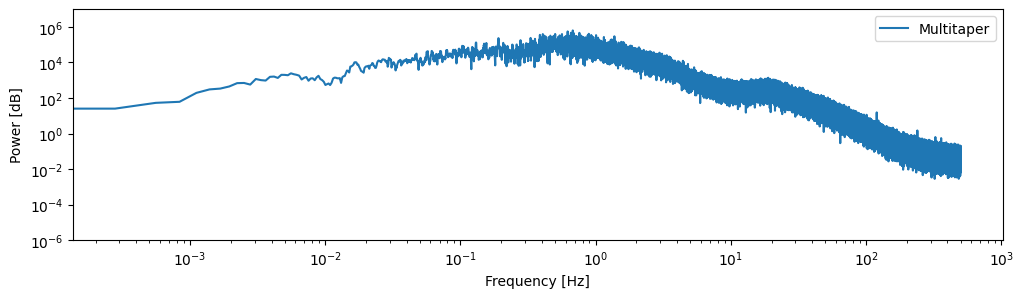

In [ ]:
data = combined_data    # Load the ECoG data.
x = data[f'channel_{47}']
ecog_time = data['ECoGTime']                    # ... and the t variable

dt = ecog_time[1] - ecog_time[0]         # Define the sampling interval.
N = x.shape[0]                           # Define the total number of data points.
T = N * dt                               # Define the total duration of the data.
T = ecog_time[-1]

NW = 3  # Define the normalized time-bandwidth product,
        # ... and compute the multitaper spectrum.
faxis, Sxx, _ = spectrum.multi_taper_psd(x - x.mean(), Fs=1/dt, NW=NW);

# loglog(X[:100], label='Rectangular taper')  # Plot the spectrum,
# loglog(XH[:100], label='Hanning taper')     # ... computed in three wasy
loglog(faxis, Sxx, label='Multitaper')
xlabel('Frequency [Hz]')                    # ... with axes labeled.
ylabel('Power [dB]')
legend()
ylim([1e-6, 10e6])
show()

In [ ]:
print(len(faxis))

1796236


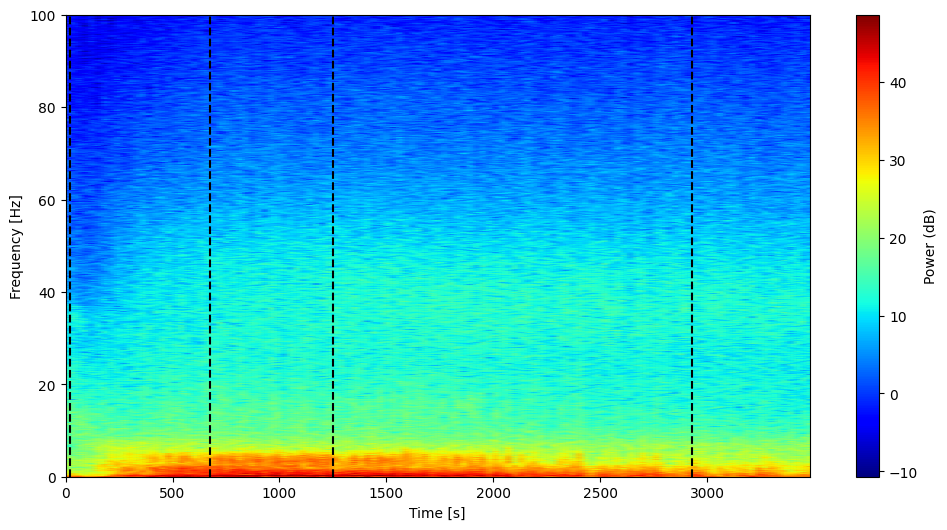

In [ ]:
# Create an instance of the plotter
plotter = PlotData(loader)

# Plot a grid of 5 electrodes for a specific session

# plotter.plot_grid('Session2', [1, 47])

# Plot a spectrogram for a given session and channel

plotter.plot_spectrogram('Session2', 45)
# plotter.plot_spectrogram('Session2', 4)

# plotter.taper(len(combined_data['ECoGTime']), combined_data['channel_47'], combined_data['ECoGTime'])
